<a href="https://colab.research.google.com/github/Zhaoxin-Hu/ECE222A/blob/master/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4

In [0]:
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(suppress=True)

from mpl_toolkits import mplot3d
import mpl_toolkits.mplot3d.axes3d as axes3d

from scipy import special
from scipy import integrate
from scipy.signal import argrelextrema

In [0]:
num_pts_theta = 1000
num_pts_phi = 500
theta, phi = np.linspace(0, np.pi, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)

Ny = 10
k = 2*np.pi
dy = np.tan(np.deg2rad(13))
theta0, phi0 = np.deg2rad(90), np.deg2rad(90)

## (d)

In [0]:
def AF_un_dB(theta, phi):
    AFy = 0
    psiy = k*dy*(np.sin(theta)*np.sin(phi)-np.sin(theta0)*np.sin(phi0))
    for n in np.arange(Ny):
        AFy = AFy + np.exp(1j*n*psiy)
    return 20*np.log10(np.abs(AFy))

AF_un_max_dB = AF_un_dB(theta2d, phi2d).max()

def AF_n_dB(theta, phi):
    return AF_un_dB(theta, phi)-AF_un_max_dB

In [0]:
R = AF_n_dB(theta2d, phi2d)
limit = -30
R[R<limit] = limit
R = R-limit
X = R*np.sin(theta2d)*np.cos(phi2d)
Y = R*np.sin(theta2d)*np.sin(phi2d)
Z = R*np.cos(theta2d)

In [0]:
norm=matplotlib.colors.SymLogNorm(1,vmin=R.min(),vmax=R.max())
colors=plt.cm.jet(norm(R)) # could use another colormap

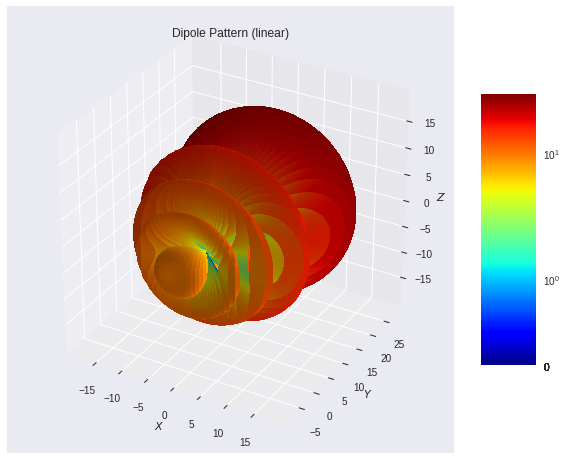

In [9]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.5, facecolors=colors, linewidth=0, antialiased=False)

# set equal aspect ratio
ax.set_aspect('equal')
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# set colorbar according to pattern
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm) # could use another colormap
sm.set_array(R-30)
fig.colorbar(sm, shrink=0.5, aspect=5)

ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.set_zlabel(r'$Z$')
ax.set_title('Dipole Pattern (linear)')
plt.show()

Text(0.5,0,'$\\theta$')

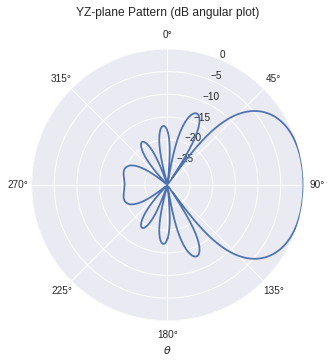

In [12]:
num_pts_theta = 1000
theta = np.linspace(-np.pi, np.pi, num_pts_theta)
plt.figure(figsize = (5,5))
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, AF_n_dB(theta, np.pi/2))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'YZ-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

Text(0.5,0,'$\\theta$')

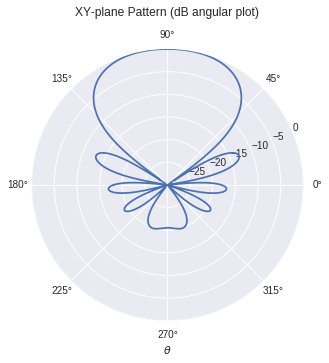

In [15]:
num_pts_phi = 1000
phi = np.linspace(-np.pi, np.pi, num_pts_phi)
plt.figure(figsize = (5,5))
ax = plt.subplot(111, projection='polar')
ax.plot(phi, AF_n_dB(np.pi/2, phi))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'XY-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

In [0]:
def AF_un(theta, phi):
    AFy = 0
    psiy = k*dy*(np.sin(theta)*np.sin(phi)-np.sin(theta0)*np.sin(phi0))
    for n in np.arange(Ny):
        AFy = AFy + np.exp(1j*n*psiy)
    return np.abs(AFy)

AF_un_max = AF_un(theta2d, phi2d).max()

def AF_n(theta, phi):
    return AF_un(theta, phi)/AF_un_max
  
def integrand(theta, phi):
    return AF_n(theta, phi)**2*np.sin(theta)

In [28]:
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi)[0]
print('beam solid angle = ', round(beam_solid_angle,2))

beam solid angle =  1.36


In [29]:
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

directivity =  9.26
directivity (dB) =  9.67


## (e)

In [0]:
def AF_un(theta, phi):
    AFy = 0
    psiy = k*dy*(np.sin(theta)*np.sin(phi)-np.sin(theta0)*np.sin(phi0))
    for n in np.arange(Ny):
        AFy = AFy + np.exp(1j*n*psiy)
    return np.abs(AFy)

AF_un_max = AF_un(theta2d, phi2d).max()

def EF(theta, phi):
    return np.abs(np.sin(theta)*np.sin(phi))

def P_un(theta, phi):
    return (AF_un(theta, phi)*EF(theta,phi))**2
  
P_un_max = P_un(theta2d, phi2d).max()

def P_n(theta, phi):
    return P_un(theta, phi)/P_un_max

def integrand(theta, phi):
    return P_n(theta, phi)*np.sin(theta)

In [50]:
num_pts_theta = 500
num_pts_phi = 500
theta, phi = np.linspace(0, np.pi, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)

def AF_un_dB(theta, phi):
    AFy = 0
    psiy = k*dy*(np.sin(theta)*np.sin(phi)-np.sin(theta0)*np.sin(phi0))
    for n in np.arange(Ny):
        AFy = AFy + np.exp(1j*n*psiy)
    return 20*np.log10(np.abs(AFy))

def EF_dB(theta, phi):
    return 20*np.log10(np.abs(np.sin(theta)*np.sin(phi)))
  
def P_un_dB(theta, phi):
    return AF_un_dB(theta, phi)+EF_dB(theta, phi)
  
P_un_max_dB = P_un_dB(theta2d, phi2d).max()

def P_n_dB(theta, phi):
    return P_un_dB(theta, phi)-P_un_max_dB  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


Text(0.5,0,'$\\theta$')

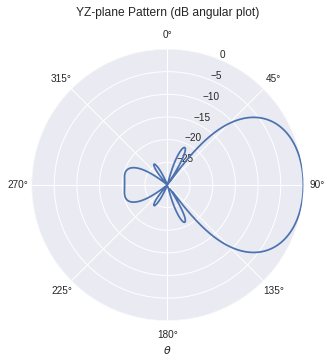

In [36]:
num_pts_theta = 1000
theta = np.linspace(-np.pi, np.pi, num_pts_theta)
plt.figure(figsize = (5,5))
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.plot(theta, 10*np.log10(P_n(theta, np.pi/2)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'YZ-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

Text(0.5,0,'$\\theta$')

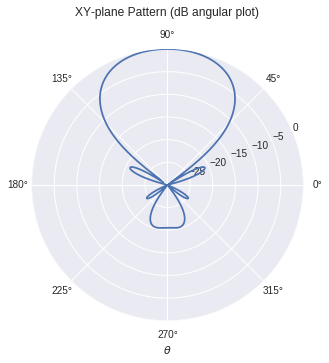

In [38]:
num_pts_phi = 1000
phi = np.linspace(-np.pi, np.pi, num_pts_phi)
plt.figure(figsize = (5,5))
ax = plt.subplot(111, projection='polar')
ax.plot(phi, 10*np.log10(P_n(np.pi/2, phi)))
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'XY-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

In [51]:
R = 10*np.log10(P_n(theta2d, phi2d))
limit = -30
R[R<limit] = limit
R = R-limit
X = R*np.sin(theta2d)*np.cos(phi2d)
Y = R*np.sin(theta2d)*np.sin(phi2d)
Z = R*np.cos(theta2d)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [0]:
norm=matplotlib.colors.SymLogNorm(1,vmin=R.min(),vmax=R.max())
colors=plt.cm.jet(norm(R)) # could use another colormap

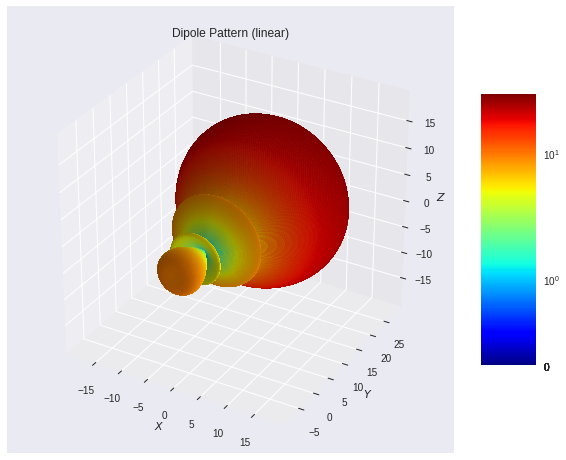

In [53]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha = 0.5, facecolors=colors, linewidth=0, antialiased=False)

# set equal aspect ratio
ax.set_aspect('equal')
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0
mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

# set colorbar according to pattern
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm) # could use another colormap
sm.set_array(R-30)
fig.colorbar(sm, shrink=0.5, aspect=5)

ax.set_xlabel(r'$X$')
ax.set_ylabel(r'$Y$')
ax.set_zlabel(r'$Z$')
ax.set_title('Dipole Pattern (linear)')
plt.show()

In [54]:
beam_solid_angle = integrate.dblquad(integrand, 0, 2*np.pi, 0, np.pi)[0]
print('beam solid angle = ', round(beam_solid_angle,2))

beam solid angle =  0.99


In [55]:
D = 4*np.pi/beam_solid_angle
D_dB = 10*np.log10(D)
print('directivity = ', round(D,2))
print('directivity (dB) = ', round(D_dB,2))

directivity =  12.7
directivity (dB) =  11.04
